## Portfolio Part 4

In this Portfolio task, I will be working with new dataset sourced from Kaggle. The dataset can be found here-www.kaggle.com/datasets/dronio/SolarEnergy


The header of the csv file is shown below. 

| UNIXTime | Data | Time | Radiation | Temperature | Pressure | Humidity | WindDirection(Degrees) |
    | Speed | TimeSunRise | TimeSunSet | 
    
#### Description of Fields

* __UNIXTime__ - Unique timecode when the file was recorded
* __Data__ - Date when the recording was done
* __Time__ - Timestamp when the recording was done
* __Radiation__ - Radiation amount
* __Temperature__ - Temperature at the time radiation was recorded
* __Pressure__ - Pressure at the time radiation was recorded
* __Humidity__ - Humidity at the time radiation was recorded
* __WindDirection(Degrees)__ - Direction of wind at the time radiation was recorded
* __Speed__ - Wind speed at the time
* __TimeSunRise__ - Time of sunrise that day
* __TimeSunSet__ - Time of sunset that day


Research Questions (Objectives)- Predict the value of the __Radiation__ field in the data from some of the other fields.

Steps to be followed-
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values <br> 
2) Convert object features into digit features by using an encoder (if any) <br>
3) Study the correlation between these features <br>
4) Split the dataset and train a linear regression model to predict 'rating' based on other features. Evaluate the accuracy of your model <br>
5) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model <br>
6) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model. <br>
7) Tune the hyper-parameter K in KNN to see how it influences the prediction performance <br>
8) Visualising the dataset <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
import os
import math
from collections import Counter
from sklearn import metrics
from sklearn import preprocessing
from sklearn import utils


%matplotlib inline

### Exploring the data

In [2]:
# Reading the dataset

df = pd.read_csv('SolarPrediction.csv')
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [3]:
df.shape

(32686, 11)

In [4]:
df1 = df[['Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']]

(array([1, 2, 3, 4, 5, 6]),
 [Text(1, 0, 'Radiation'),
  Text(2, 0, 'Temperature'),
  Text(3, 0, 'Pressure'),
  Text(4, 0, 'Humidity'),
  Text(5, 0, 'WindDirection(Degrees)'),
  Text(6, 0, 'Speed')])

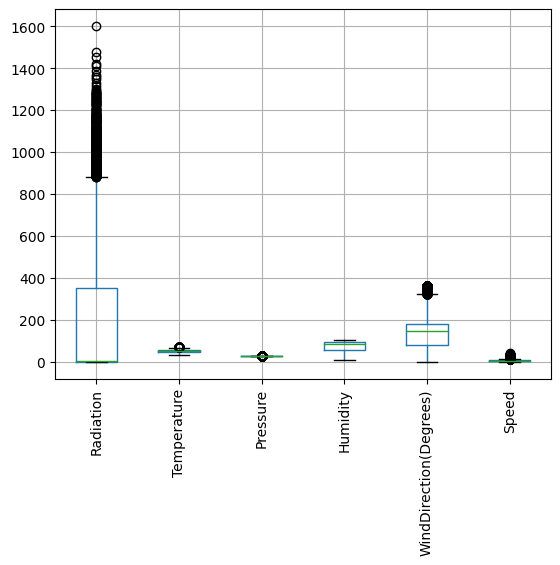

In [5]:
# Finding outliers

df1.boxplot()
plt.xticks(rotation=90)

We can see there are outliers present in almost all of the features.

In [6]:
# Removing the outliers using IQR method

# Speed

speed_q1 = df1['Speed'].quantile(0.25)
speed_q3 = df1['Speed'].quantile(0.75)
speed_IQR = speed_q3 - speed_q1 

speed_max = speed_q3+(1.5*speed_IQR)
speed_min = speed_q1-(1.5*speed_IQR)

# Radiation

radiation_q1 = df1['Radiation'].quantile(0.25)
radiation_q3 = df1['Radiation'].quantile(0.75)
radiation_IQR = radiation_q3 - radiation_q1 

radiation_max = radiation_q3+(1.5*radiation_IQR)
radiation_min = radiation_q1-(1.5*radiation_IQR)

# Temperature

temperature_q1 = df1['Temperature'].quantile(0.25)
temperature_q3 = df1['Temperature'].quantile(0.75)
temperature_IQR = temperature_q3 - temperature_q1 

temperature_max = temperature_q3+(1.5*temperature_IQR)
temperature_min = temperature_q1-(1.5*temperature_IQR)

# Pressure

pressure_q1 = df1['Pressure'].quantile(0.25)
pressure_q3 = df1['Pressure'].quantile(0.75)
pressure_IQR = pressure_q3 - pressure_q1 

pressure_max = pressure_q3+(1.5*pressure_IQR)
pressure_min = pressure_q1-(1.5*pressure_IQR)

# Humidity

humidity_q1 = df1['Humidity'].quantile(0.25)
humidity_q3 = df1['Humidity'].quantile(0.75)
humidity_IQR = humidity_q3 - humidity_q1 

humidity_max = humidity_q3+(1.5*humidity_IQR)
humidity_min = humidity_q1-(1.5*humidity_IQR)

# Wind Direction (Degrees)

wd_q1 = df1['WindDirection(Degrees)'].quantile(0.25)
wd_q3 = df1['WindDirection(Degrees)'].quantile(0.75)
wd_IQR = wd_q3 - wd_q1 

wd_max = wd_q3+(1.5*wd_IQR)
wd_min = wd_q1-(1.5*wd_IQR)

In [7]:
# Replacing outliers with null values

# Speed

df1.loc[df1['Speed'] < speed_min,'Speed'] = np.nan
df1.loc[df1['Speed'] > speed_max,'Speed'] = np.nan

# Temperature

df1.loc[df1['Temperature'] < temperature_min,'Temperature'] = np.nan
df1.loc[df1['Temperature'] > temperature_max,'Temperature'] = np.nan

# Radiation

df1.loc[df1['Radiation'] < radiation_min,'Radiation'] = np.nan
df1.loc[df1['Radiation'] > radiation_max,'Radiation'] = np.nan

# Humidity

df1.loc[df1['Humidity'] < humidity_min,'Humidity'] = np.nan
df1.loc[df1['Humidity'] > humidity_max,'Humidity'] = np.nan

# Pressure

df1.loc[df1['Pressure'] < pressure_min,'Pressure'] = np.nan
df1.loc[df1['Pressure'] > pressure_max,'Pressure'] = np.nan

# Wind Direction (Degrees)

df1.loc[df1['WindDirection(Degrees)'] < wd_min,'WindDirection(Degrees)'] = np.nan
df1.loc[df1['WindDirection(Degrees)'] > wd_max,'WindDirection(Degrees)'] = np.nan


df1.isnull().sum()

Radiation                 1965
Temperature                 89
Pressure                  1662
Humidity                     0
WindDirection(Degrees)    1618
Speed                      479
dtype: int64

In [8]:
# Removing null values

df1 = df1.dropna(axis = 0)

In [9]:
# New shape of the dataset

df1.shape

(27577, 6)

### Correlation between features

In [10]:
# Calculating correlation between features

df1.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
Radiation,1.000000,0.684761,0.103693,-0.169492,-0.409148,0.040433
Temperature,0.684761,1.000000,0.263242,-0.223959,-0.435735,-0.098841
Pressure,0.103693,0.263242,1.000000,-0.272339,-0.116330,0.060027
Humidity,-0.169492,-0.223959,-0.272339,1.000000,-0.057222,-0.207205
WindDirection(Degrees),-0.409148,-0.435735,-0.116330,-0.057222,1.000000,0.103261
Speed,0.040433,-0.098841,0.060027,-0.207205,0.103261,1.000000


AxesSubplot(0.125,0.11;0.62x0.77)


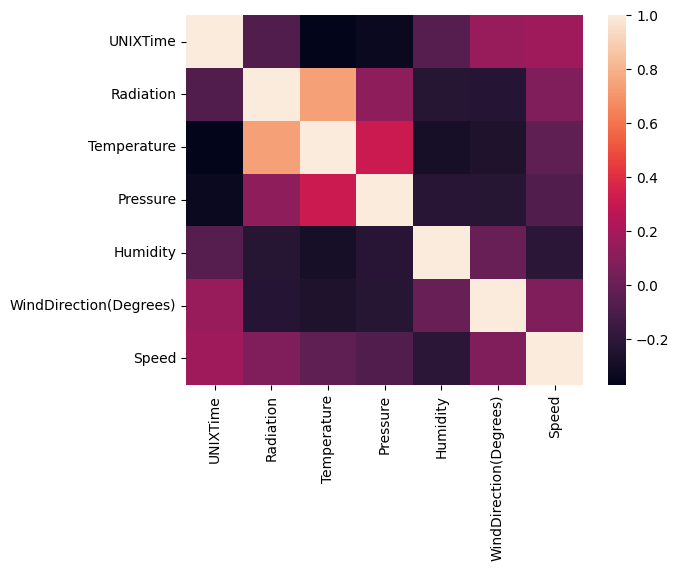

In [11]:
corr = sns.heatmap(df.corr())
print(corr)

##### Correlation Analysis

- Most correlated features- Radiation and Temperature (Positive) 
- Least correlated features- Speed and Temperature (negative)

### Splitting the dataset into Train & Test data

In [12]:
# Splitting train and test sets

train, test= train_test_split(df1, test_size=0.2, random_state=0)
print("Train shape-", train.shape)
print("Test shape-", test.shape)

Train shape- (22061, 6)
Test shape- (5516, 6)


### Linear Regression model to predict 'Radiation'

In [13]:
# Training the LinR model with the most correlated features

reg = linear_model.LinearRegression()
X_train_M = train[['Temperature']]
y_train_M = train['Radiation']

X_test_M = test[['Temperature']]
y_test_M = test['Radiation']

reg.fit(X_train_M, y_train_M)

LinearRegression()

In [14]:
# Evaluating the performance of the model above

predicted_M = reg.predict(X_test_M)
mse = ((np.array(y_test_M)-predicted_M)**2).sum()/len(y_test_M)
rmse = np.sqrt(mse)
print("Case - the results for the model with most correlated features")
print("reg MSE:", mse)
print("reg Root MSE:", rmse)

Case - the results for the model with most correlated features
reg MSE: 32652.968267143773
reg Root MSE: 180.70132336854584


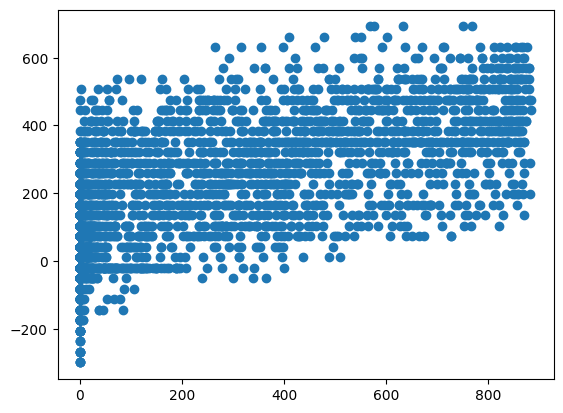

In [15]:
# Visualising the results using scatter plot

plt.scatter(y_test_M,predicted_M)

In [16]:
# Training the LinR model with the least correlated features

reg = linear_model.LinearRegression()
X_train_L = train[['Speed', 'Temperature']]
y_train_L = train['Radiation']

X_test_L = test[['Temperature', 'Speed']]
y_test_L = test['Radiation']

reg.fit(X_train_L, y_train_L)

LinearRegression()

In [17]:
# Evaluating the performance of the model above

predicted_L = reg.predict(X_test_L)
mse = ((np.array(y_test_L)-predicted_L)**2).sum()/len(y_test_L)
rmse = np.sqrt(mse)
print("Case - the results for the model with most correlated features")
print("reg MSE:", mse)
print("reg Root MSE:", rmse)

Case - the results for the model with most correlated features
reg MSE: 1052914.6806640013
reg Root MSE: 1026.116309520515


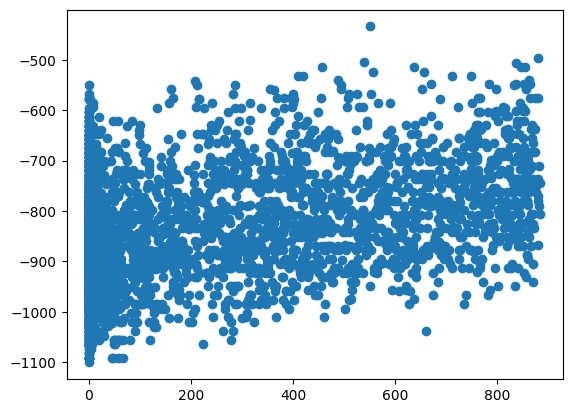

In [18]:
# Visualising the results using scatter plot

plt.scatter(y_test_L,predicted_L)

### Logistic Regression Model

In [19]:
# Training the Regression model with most important features

X_train = train[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]
y_train = train['Radiation']

X_test = test[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']]
y_test = test['Radiation']

In [20]:
# Converting Radiation values to categorical values

label_encoder = preprocessing.LabelEncoder()
train_y = label_encoder.fit_transform(y_train)
test_y = label_encoder.fit_transform(y_test)

In [21]:
# Running the model

model= LogisticRegression()
model.fit(X_train, train_y)

LogisticRegression()

In [22]:
# Evaluating the performance of the model above

reg = linear_model.LogisticRegression()
reg.fit(X_train, train_y)
predicted = reg.predict(X_test)
mse = ((np.array(test_y)-predicted)**2).sum()/len(test_y)
r2 = r2_score(test_y, predicted)

print("Accuracy score:", accuracy_score(test_y, predicted))
print(classification_report(test_y, predicted))

Accuracy score: 0.03807106598984772
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00       193
           5       0.00      0.00      0.00       304
           6       0.00      0.00      0.00       378
           7       0.09      0.00      0.01       456
           8       0.06      0.02      0.03       384
           9       0.07      0.33      0.12       321
          10       0.09      0.00      0.01       233
          11       0.04      0.59      0.07       128
          12       0.01      0.17      0.02        77
          13       0.01      0.06      0.01        54
          14       0.01      0.03      0.01        40
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00  

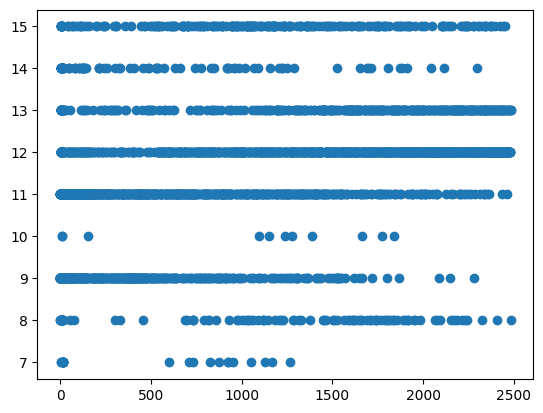

In [23]:
# Visualising the results using scatter plot

plt.scatter(test_y,predicted)

### KNN Model

In [24]:
# Creating KNN classifier
knn5 = KNeighborsClassifier(n_neighbors=5)

# Fitting the classifier to the data
knn5.fit(X_train,train_y)

KNeighborsClassifier()

In [25]:
# Predicting test data set
y_pred = knn5.predict(X_test)

# Checking the performance of our model with classification report.
print(classification_report(test_y, y_pred))

# Checking the performance of our model.
print("Accuracy score:", accuracy_score(test_y, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        40
           3       0.13      0.02      0.04        91
           4       0.11      0.02      0.03       193
           5       0.17      0.04      0.07       304
           6       0.11      0.07      0.08       378
           7       0.10      0.09      0.10       456
           8       0.08      0.12      0.09       384
           9       0.08      0.17      0.11       321
          10       0.06      0.18      0.09       233
          11       0.03      0.12      0.04       128
          12       0.02      0.09      0.03        77
          13       0.03      0.09      0.04        54
          14       0.02      0.07      0.04        40
          15       0.00      0.00      0.00        35
          16       0.04      0.12      0.06        16
          17       0.10    

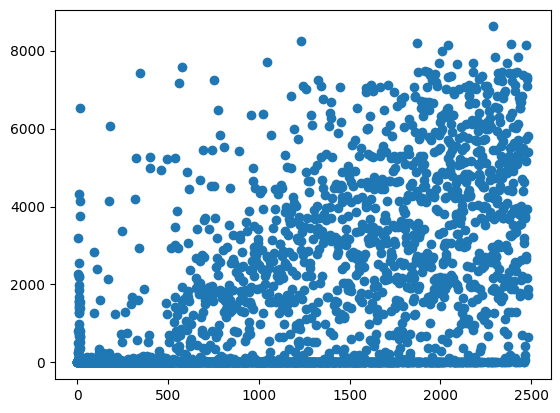

In [26]:
# Visualising the results using scatter plot

plt.scatter(test_y,y_pred)

In [27]:
# Hyperparameter tuning

# Hyperparameter that we want to tune
parameter_grid = {"n_neighbors" : range(1,100)}


# Create new KNN object
knn_best = KNeighborsClassifier()

# Using GridsearchCV
knn_best_tune= GridSearchCV(knn_best, parameter_grid, scoring = "accuracy", cv = 5)

# Fitting the classifier into the data
knn_best_tune.fit(X_train, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)}, scoring='accuracy')

In [28]:
# Printing the value of best Hyperparameter

knn_best_tune.best_params_

{'n_neighbors': 69}

In [29]:
# New accuracy score

knn_best_tune.best_score_

0.08331457642147294